In [203]:
#!/usr/bin/env python3
from scipy import ndimage
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#number of grid points
N = 100

#omega definition
w = 1.9

#define empty grid voltage
U = np.zeros((N,N))

In [204]:
#boundary conditions
#border of box
R = np.ones_like(U)*w/4
R[0,:] = 0
R[-1,:] = 0
R[:,0] = 0
R[:,-1] = 0

##################building components######################
U[int(N/2), int(N/4):(int(N/4)+int(N/2))] = 1000 # set the initial value of the stick to be 1000
R[int(N/2), int(N/4):(int(N/4)+int(N/2))] = 0 # prohibit the value of the stick to be updated

update_mask = (R == w/4) # we do this, to prevent our system from updating the fixed positions (0 Volts and 1000 Volts)

#checker board
B = np.indices((N, N)).sum(axis=0) % 2 == 0

0 1.0


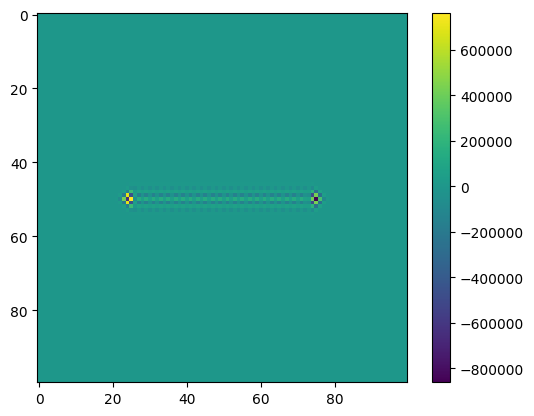

In [207]:
C = np.ones_like(U)
M = np.ones_like(U)

#count steps
nsteps = 0
diff = np.max(np.abs(M))


# first we do this without the checkerboard pattern
W = np.array([[0,1,0],[1,-4,1],[0,1,0]])

#iterate until voltage change is smaller than 1e-3
W = np.array([[0,1,0],[1,-4,1],[0,1,0]])
while diff >= 1e-3 and nsteps < 1:
    print(nsteps,diff)
    ndimage.convolve(U,W, output = C, mode = "constant", cval = 0)
    M = U - C
    U = U + M

    nsteps += 1
    diff = np.max(np.abs(M))


plt.imshow(U, cmap='viridis')
plt.colorbar()

In [206]:
###########
W = np.array([[0,1,0],[1,-4,1],[0,1,0]])
ndimage.convolve(U,W, output = C, mode = "constant", cval = 0)
M  = U - C
U[B] = U[B] + M[B]
ndimage.convolve(U,W, output = C, mode = "constant", cval = 0)
M  = U - C
U[~B] = U[~B] + M[~B]


# these are used to do the calculation without the convolve stuff
#C[....] = U[....] + U[....] + U[....] + U[....] - 4.0*U[....]
#M  = ....
#C[....] = U[....] + U[....] + U[....] + U[....] - 4.0*U[....]
#M  = ....
#U[~B] = U[~B] + M[~B]
##########